**Exercitiul 1**

In [1]:
train = [(160, 'F'), (165, 'F'), (155, 'F'), (172, 'F'), (175, 'B'), (180, 'B'), (177, 'B'), (190, 'B')]

Urmatoarea celula calculeaza probabilitatile pentru cele 2 clase (P(c) in pdf-ul laboratorului).

prob_classes - este un dictionar in care se vor retine aceste probabilitati. Cheile dictionarului sunt clasele, iar valorile sunt probabilitatile

In [2]:
prob_classes = {}
for elem in train:
    if elem[1] not in prob_classes:
        prob_classes[elem[1]]=1
    else:
        prob_classes[elem[1]]+=1
for clazz in prob_classes:
    prob_classes[clazz] /=len(train)
print('P(c):', prob_classes)

P(c): {'F': 0.5, 'B': 0.5}


Urmatoarea celula transforma datele de antrenare in categorii. Este verificata fiecare inaltime din variabila train si in functie de valoarea ei este asignata unei categorii (1, 2, 3 sau 4)

In [3]:
new_train = []
for elem in train:
    if 150 <= elem[0] <=160:
        new_train.append(1)
    elif 161 <= elem[0] <=170:
        new_train.append(2)
    elif 171 <=elem[0] <=180:
        new_train.append(3)
    elif 181 <=elem[0] <=190:
        new_train.append(4)


Scopul este sa calculam P(F|h=3) si P(B|h=3). Pentru a face asta este nevoie sa obtinem P(h=3|F), P(h=3|B) si P(h=3).

Observatie: P(F) si P(B) le avem deja, sunt stocate in prob_classes.

P(h=3|F) = (numarul de exemple din datele de antrenare ale clasei F care au inaltimea din categorial 3) / (numarul de exemple de antrenare ale clasei F)

P(h=3|B) = (numarul de exemple din datele de antrenare ale clasei B care au inaltimea din categorial 3) / (numarul de exemple de antrenare ale clasei B)

P(h=3) = (numarul de exemple din categoria 3)/ (numarul total de exemple)

Codul din celula urmatoare calculeaza aceste count-uri necesare pentru a calcula probabilitatile.
Apoi salveaza P(h=3|F) in prob_3_given_girl, P(h=3|B) in prob_3_given_boy si P(h=3) in prob_att_3



In [4]:
count_girl=0
count_boy=0
count_att3_girl=0
count_att3_boy=0
for i,elem in enumerate(train):
    if elem[1] == 'F':
        count_girl +=1
        if new_train[i] == 3:
            count_att3_girl+=1
    else:
        count_boy+=1
        if new_train[i] ==3:
            count_att3_boy+=1
prob_3_given_girl = count_att3_girl/count_girl
prob_3_given_boy = count_att3_boy/count_boy
prob_att_3 = (count_att3_girl+count_att3_boy)/len(train)

Probabilitatile pe care le-am obtinut, le inseram in formula lui Bayes si obtinem probabilitatile cerute de exercitiu. Asta se intampla in urmatoarea celula

In [5]:
prob_girl = prob_classes['F'] * prob_3_given_girl/ prob_att_3
prob_boy = prob_classes['B'] * prob_3_given_boy/ prob_att_3

In [6]:
print(prob_boy,prob_girl)

0.75 0.25


**Exercitiul 2**

Citim subsetul de imagini MNIST si le salvam in train_images si test_images.

train_images -> este un vector cu 1000 de imagini (fiecare imagine e reprezentata de un vector cu 784 de elemente). Deci, train_images este o matrice cu 1000 de linii si 784 de coloane.

test_images -> este un vector cu 50 de imagini (fiecare imagine e reprezentata de un vector cu 784 de elemente). Deci, test_images este o matrice cu 500 de linii si 784 de coloane.

train_labels -> este un vector cu 1000 de componente, si componenta de pe pozitia *i* ne spune cifra din imaginea de pe linia *i* din matricea train_images

test_labels -> este un vector cu 500 de componente, si componenta de pe pozitia *i* ne spune cifra din imaginea de pe linia *i* din matricea test_images



In [7]:
!unzip ./data_MNIST.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
import numpy as np

train_images = np.loadtxt('./data/train_images.txt') 
train_labels = np.loadtxt('./data/train_labels.txt', 'float')
test_images = np.loadtxt('./data/test_images.txt') 
test_labels = np.loadtxt('./data/test_labels.txt', 'float')

Functia *get_intervals* de mai jos ne returneaza capetele intervalelor cu care putem categorisii pixeli.

Pentru apelul *get_intervals(5)* functia va intoarce: [  0.,  64., 128., 192., 256.]. Ceea ce inseamna ca toti pixelii ce au valori intre 0 si 63 vor fi considerati din categoria 1, pixelii cu valori intre 64 si 127 in categoria 2, cei cu valori intre 128 si 191 in categoria 3 si cei cu valori intre 192 si 255 in categoria 4.

Functia *values_to_bins* transforma matricea x (noi o sa apelam cu x=train_images si x=test_images) care contine pixeli, intr-o matrice de aceleasi dimensiuni in care pixelii sunt inlocuiti cu categoriile corespunzatoare.

In [9]:
def get_intervals(num_bins):
    bins = np.linspace(start=0, stop=256, num=num_bins)
    return bins

def values_to_bins(x,bins):
    new_x = np.zeros(x.shape)
    for i, elem in enumerate(x):
        new_x[i] = np.digitize(elem, bins)
    return new_x - 1

Urmatoarea celula face apelul catre functiile anterioare pentru a transforma imaginile de antrenare si test in vectori care contin doar valorile 0,1,2,3

In [15]:
bins = get_intervals(5)
x_train = values_to_bins(train_images,bins)
x_test = values_to_bins(test_images,bins)

**Exercitiul 3**

Antrenarea modelului NaiveBayes (calcularea probabilitatilor necesare din datele de antrenare)  se face prin apelarea functiei *fit*, iar acuratetea pentru datele de test poate fi obtinuta cu functia *score*

In [11]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train, train_labels)
naive_bayes_model.score(x_test, test_labels)

0.836

**Exercitiul 4**

Exact ce s-a facut pentru exercitiile 2 si 3, se face si pentru acest exercitiu. Doar ca este repetat pentru fiecare din n_bins

In [12]:
num_bins = [3,5,7,9,11]
for n_bins in num_bins:
    bins = get_intervals(n_bins)
    x_train = values_to_bins(train_images,bins)
    x_test = values_to_bins(test_images,bins)
  
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(x_train, train_labels)
    print(f'Num bins {n_bins}, accuracy {naive_bayes_model.score(x_test, test_labels)}')

Num bins 3, accuracy 0.83
Num bins 5, accuracy 0.836
Num bins 7, accuracy 0.842
Num bins 9, accuracy 0.842
Num bins 11, accuracy 0.842


**Exercitiul 5**

Pentru acest exercitiu luam predictiile modelului pe intreg setul de test, cu functia *predict*.

Si apoi iteram prin acestea si le comparam cu clasa reala a exemplului. Daca predictia e diferita de clasa reala atunci afisam exemplul.

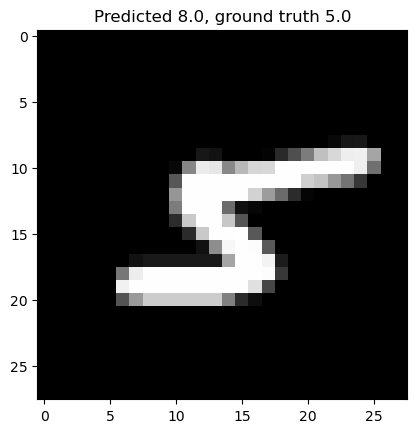

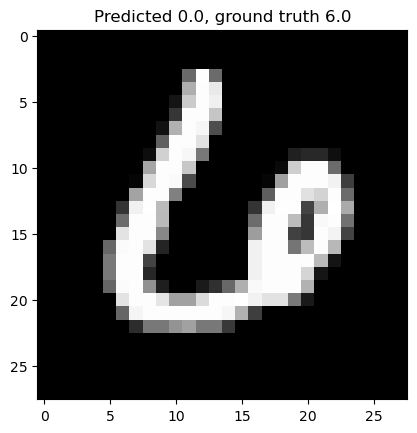

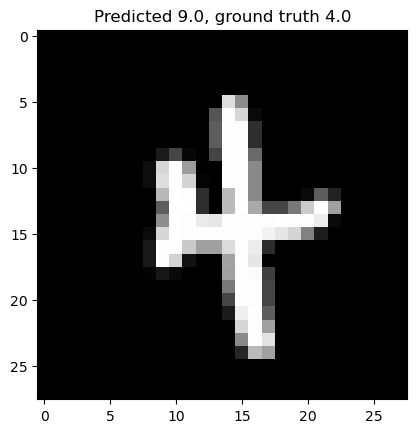

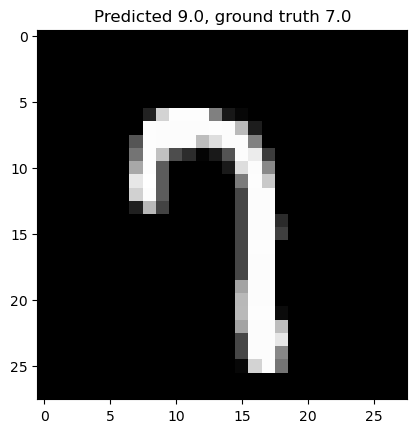

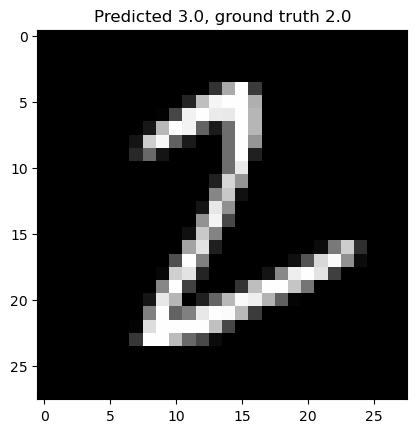

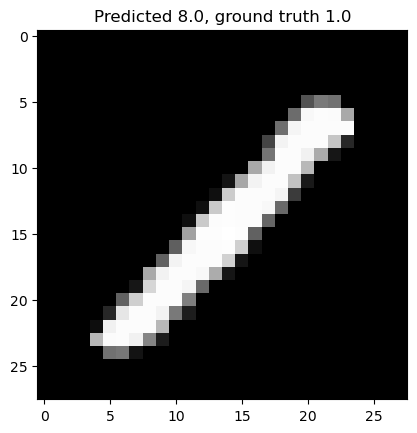

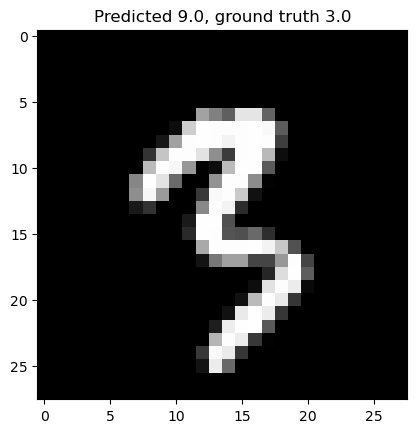

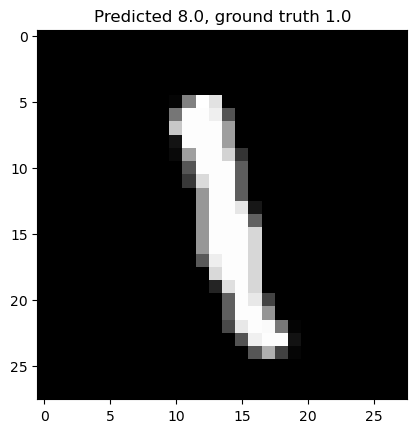

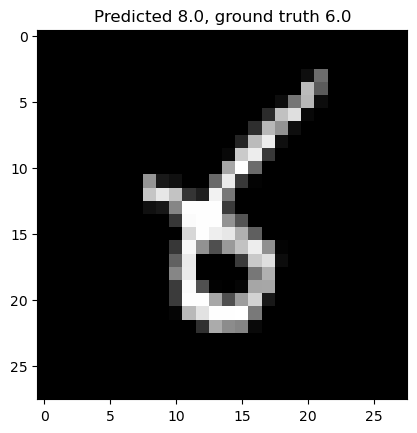

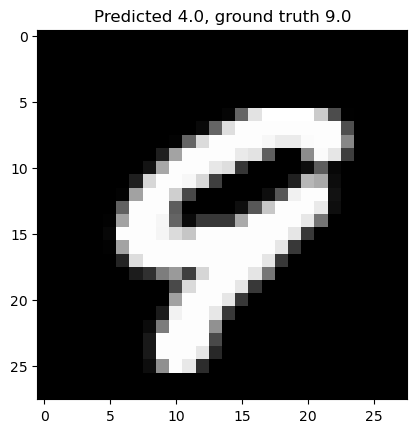

In [13]:
import matplotlib.pyplot as plt
def show_misclassified_images(model, labels, images,num=10):
    pred_labels = model.predict(images)
    count = 0
    for i in range(pred_labels.shape[0]):
        if pred_labels[i] != labels[i]:
            image = np.reshape(images[i], (28, 28))
            plt.imshow(image.astype(np.uint8), cmap='gray')
            plt.title(f'Predicted {pred_labels[i]}, ground truth {labels[i]}')
            plt.show()
            count+=1
            if count == num:
                break
show_misclassified_images(naive_bayes_model, test_labels,test_images)


**Exercitiul 6**

Functia confusion matrix primeste ca input predictiile si clasele reale si returneaza matricea de confuzie.

Matricea de confuzie este patratica, de forma *nr_de_clase* x *nr_de_clase*.

Fiecare element *cij* reprezinta de cate ori clasa *i* a fost prezisa ca fiind clasa *j*. ( in cazul nostru *i* si *j* se *plimba* de la 0 la 9)

Deci, daca j este diferit de i atunci cij ne spune de cate ori clasa i a fost confuzata cu clasa j.

In [14]:
from sklearn.metrics import accuracy_score

def confusion_matrix(pred_labels, labels):
    dim = np.unique(pred_labels).shape[0]
    confusion_matrix = np.zeros((dim,dim))
    for i in range(labels.shape[0]):
        confusion_matrix[int(labels[i]),int(pred_labels[i])]+=1
    return confusion_matrix

bins = get_intervals(5)
x_train = values_to_bins(train_images,bins)
x_test = values_to_bins(test_images,bins)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train, train_labels)
naive_bayes_model.score(x_test, test_labels)

pred_labels = naive_bayes_model.predict(x_test)
print(accuracy_score(pred_labels, test_labels))
print(confusion_matrix(pred_labels, test_labels))

0.836
[[51.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0. 48.  0.  0.  0.  0.  0.  0.  4.  0.]
 [ 2.  1. 50.  1.  1.  0.  1.  1.  1.  0.]
 [ 0.  0.  1. 49.  0.  0.  0.  0.  0.  3.]
 [ 0.  0.  0.  0. 33.  0.  0.  0.  2. 11.]
 [ 1.  0.  0.  9.  0. 34.  1.  0.  6.  1.]
 [ 1.  1.  0.  0.  1.  0. 43.  0.  2.  0.]
 [ 0.  1.  0.  0.  2.  0.  0. 41.  0.  6.]
 [ 0.  1.  3.  3.  1.  1.  1.  1. 34.  1.]
 [ 0.  0.  1.  1.  5.  0.  0.  0.  0. 35.]]
